In [1]:
library(dplyr)
library(tidytext)
library(tokenizers)
library(tidyr)
library(ggplot2)
library(tm)
library(wordcloud)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Carregando pacotes exigidos: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


Carregando pacotes exigidos: RColorBrewer



In [2]:
listAtas <- list.files(path="atas", pattern=".txt", all.files=TRUE, full.names=TRUE)

print(paste(length(listAtas),"atas"))

[1] "228 atas"


In [3]:
corpus <- c()
for(ata in listAtas){
    lines <- readLines(con = ata, encoding = "UTF-8")
    lines <- paste(lines, collapse = " ")
    corpus <- c(corpus,lines)
}
print(paste(length(corpus),"atas"))

Warning message in readLines(con = ata, encoding = "UTF-8"):
“linha final incompleta encontrada em 'atas/ata248.txt'”


[1] "228 atas"


# Corpus Characteristics 

In [4]:
corpusJoined <- paste(corpus, collapse = ' ')
corpusJoinedWithoutPunctuation <- tm::removePunctuation(corpusJoined)
corpusWordTokenized <- tokenizers::tokenize_words(corpusJoined, simplify = TRUE)
corpusWordTokenizedWithoutPunctuation <- tokenizers::tokenize_words(corpusJoinedWithoutPunctuation, simplify = TRUE)
corpusJoinedWithoutSpaces <- gsub(pattern = " ", replacement = "", x = corpusJoined)
corpusSentences <- tokenizers::tokenize_sentences(corpusJoined,simplify = TRUE)

In [5]:
print(paste0("Number of characters with spaces: ", nchar(corpusJoined)))
print(paste0("Number of characters without spaces: ", nchar(corpusJoinedWithoutSpaces)))
print(paste0("Number of words: ",length(corpusWordTokenizedWithoutPunctuation)))
print(paste0("Number of sentences: ", length(corpusSentences)))
print(paste0("Number of characters per words: ", nchar(corpusJoinedWithoutSpaces)/length(corpusWordTokenizedWithoutPunctuation)))
print(paste0("Number of words per sentence: ", length(corpusWordTokenizedWithoutPunctuation)/length(corpusSentences)))

[1] "Number of characters with spaces: 7582396"
[1] "Number of characters without spaces: 6375658"
[1] "Number of words: 1189863"
[1] "Number of sentences: 47533"
[1] "Number of characters per words: 5.35831267969506"
[1] "Number of words per sentence: 25.0323564681379"


# Frequencies 

In [6]:
df <- data.frame(sentence = corpus, stringsAsFactors = FALSE)

In [7]:
Mystopwords <- c('ainda','ante','p','r','sobre', 'janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','mês','meses','ano','anos', as.character(0:9),tm::stopwords('pt'))


## Character frequency 

In [8]:
charFreq <- df %>%
  unnest_tokens(character, sentence, token = "characters") %>%
  count(character, sort = TRUE) %>%
  ungroup()

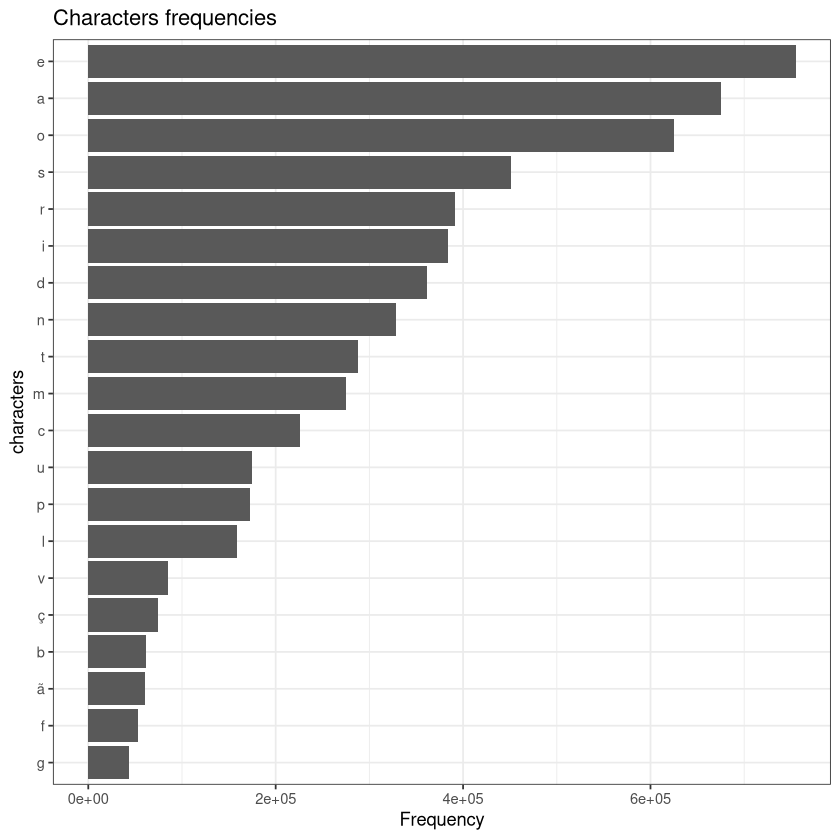

In [9]:
number_of_chars <- 20
ggplot(charFreq[1:number_of_chars,],aes(x = reorder(character,n), n)) +
  geom_bar(stat="identity") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ylab("Frequency") + xlab("characters") + ggtitle("Characters frequencies") +
  theme_bw() +
  coord_flip()

## Word Frequency

In [10]:
numberOfWords <- 20

### With stop words

In [11]:
wordsFreq <- df %>%
  unnest_tokens(word, sentence) %>%
  count(word, sort = TRUE) %>%
  ungroup()

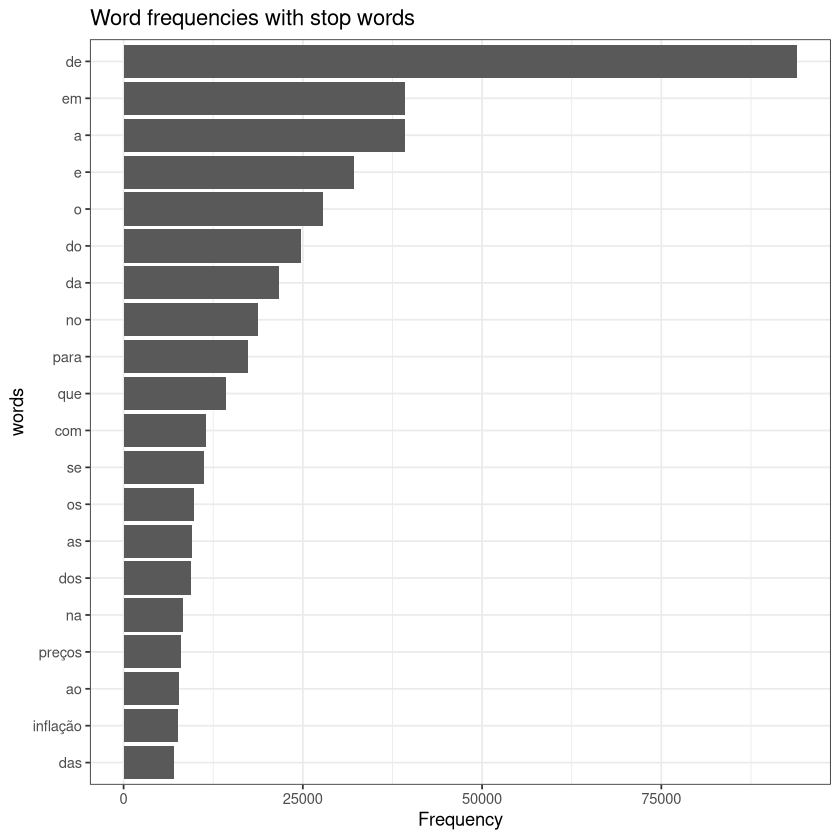

In [12]:
ggplot(wordsFreq[1:numberOfWords,],aes(x = reorder(word,n), n)) +
  geom_bar(stat="identity") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ylab("Frequency") + xlab("words") + ggtitle("Word frequencies with stop words") +
  theme_bw() +  
  coord_flip()

### Wordcloud with stop words

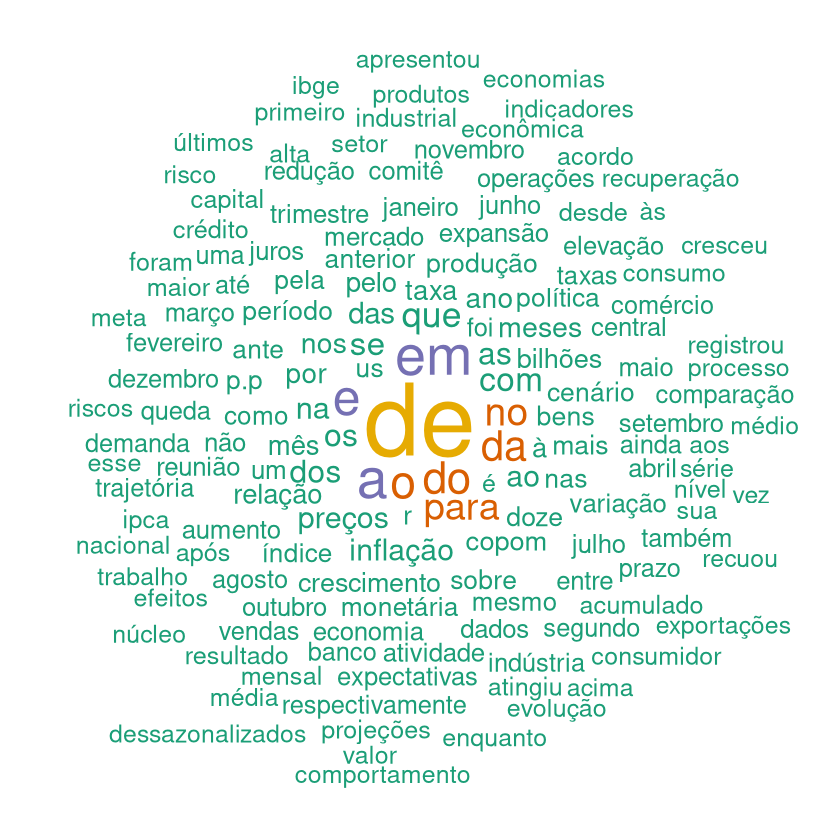

In [13]:
wordcloud(words = wordsFreq$word,freq = wordsFreq$n, min.freq = 1000, random.order=FALSE, max.words=1000, rot.per=0, colors=brewer.pal(6, "Dark2"),scale = c(5, 1.2))

### Without stop words

In [14]:
wordsFreq2 <- wordsFreq %>%
  filter(!word %in% Mystopwords)

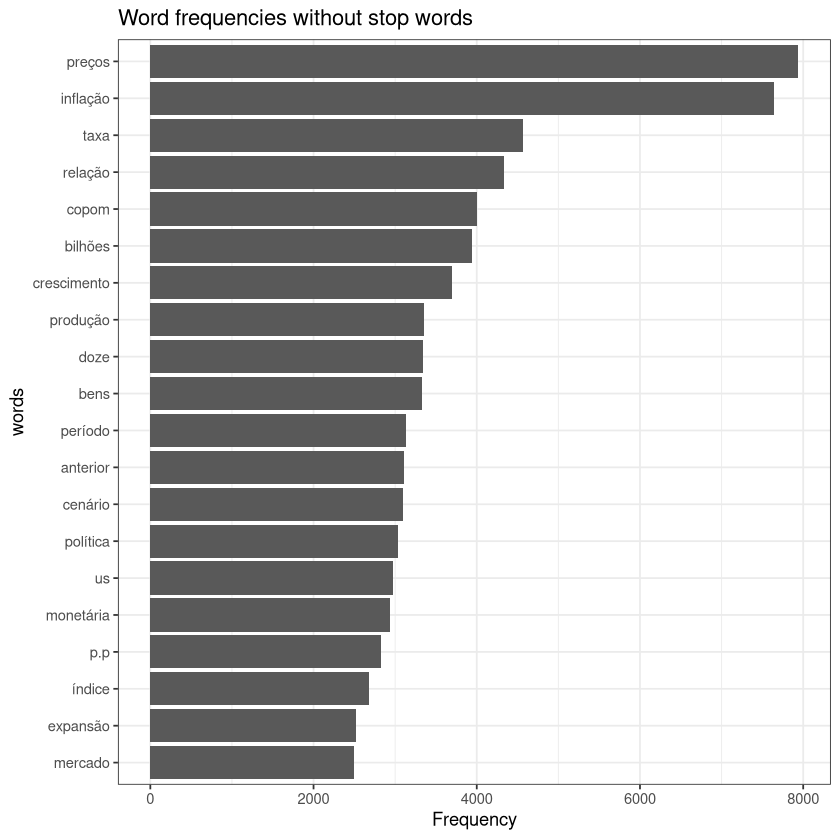

In [15]:
ggplot(wordsFreq2[1:numberOfWords,],aes(x = reorder(word,n), n)) +
  geom_bar(stat="identity") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ylab("Frequency") + xlab("words") + ggtitle("Word frequencies without stop words") +
  theme_bw() +
  coord_flip()

### Wordcloud without stop words

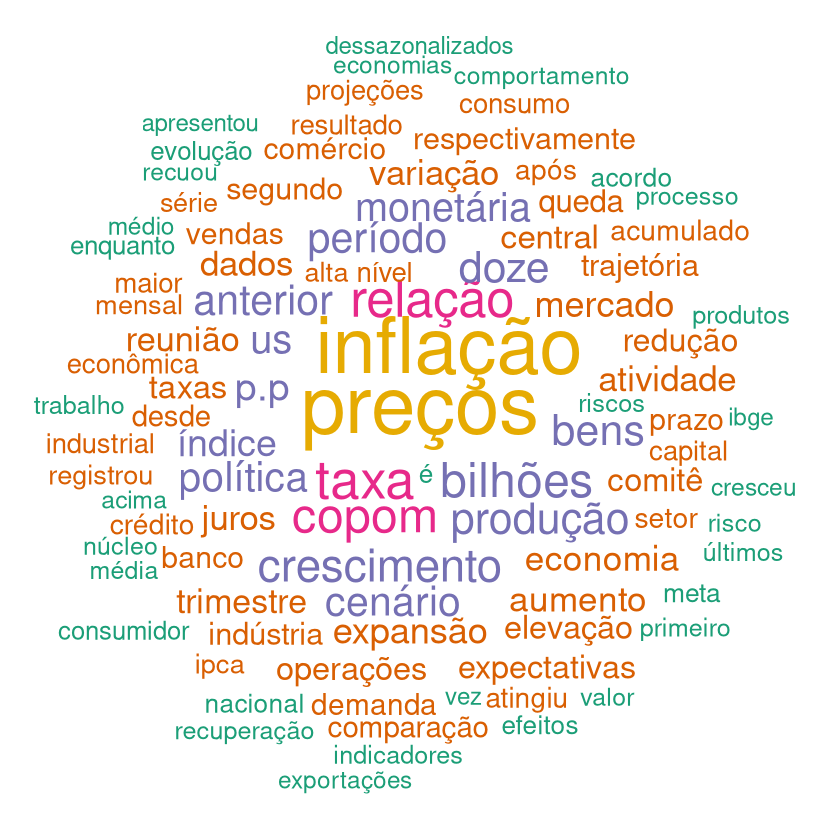

In [16]:
wordcloud(words = wordsFreq2$word,freq = wordsFreq2$n, min.freq = 1000, random.order=FALSE, max.words=1000, rot.per=0, colors=brewer.pal(6, "Dark2"),scale = c(4, 0.8))

## Bigram Frequency
 

In [17]:
numberOfBigram <- 20

### With stop words

In [18]:
bigramFreq <- df %>%
  unnest_tokens(word, sentence, token = "ngrams", n = 2) %>%
  count(word, sort = TRUE) %>%
  ungroup()

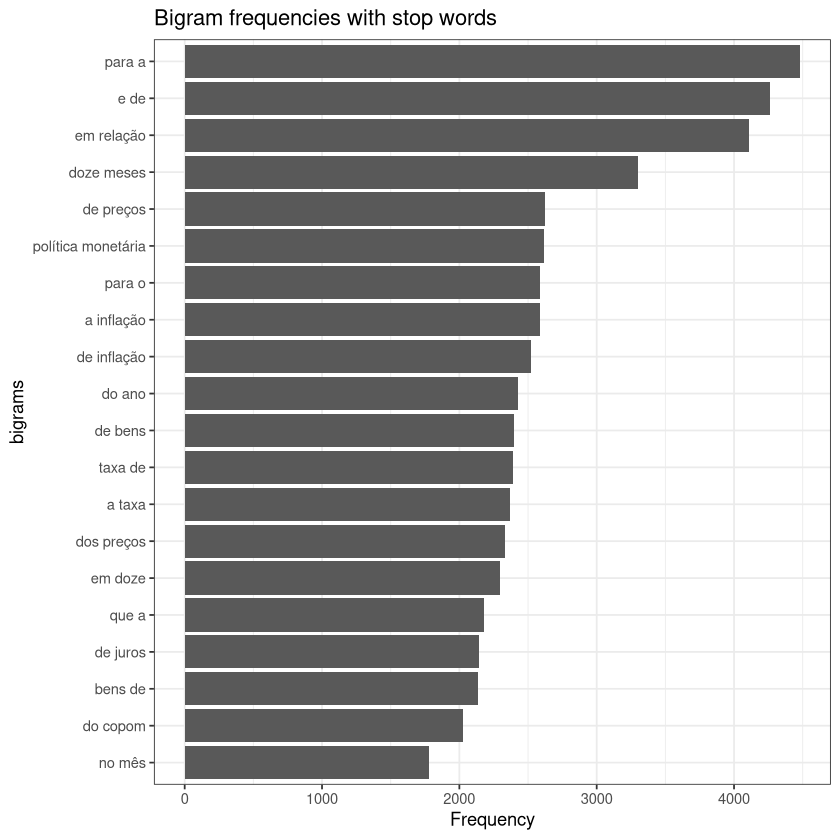

In [19]:
ggplot(bigramFreq[1:numberOfBigram,],aes(x = reorder(word,n), n)) +
  geom_bar(stat="identity") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ylab("Frequency") + xlab("bigrams") + ggtitle("Bigram frequencies with stop words") +
  theme_bw() +
  coord_flip()

### bigram cloud with stop words

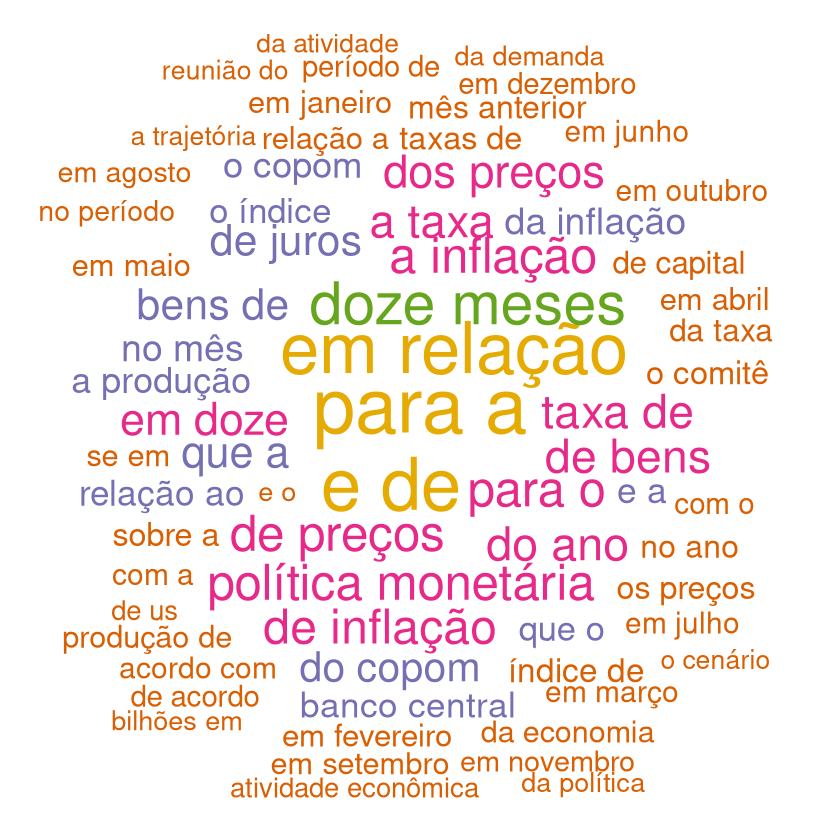

In [20]:
wordcloud(words = bigramFreq$word,freq = bigramFreq$n, min.freq = 1000, random.order=FALSE, max.words=1000, rot.per=0, colors=brewer.pal(6, "Dark2"),scale = c(3.8, 0.6))

### Without stopwords

In [21]:
bigramFreq2 <- bigramFreq %>% select(word,n) %>% 
  separate(word, c("word1", "word2"), sep = " ")

bigramFreq2 <- bigramFreq2 %>%
  filter(!word1 %in% Mystopwords) %>%
  filter(!word2 %in% Mystopwords)

bigramFreq2 <- bigramFreq2 %>% select(word1, word2, n) %>% 
  unite(word, word1, word2, sep = " ")

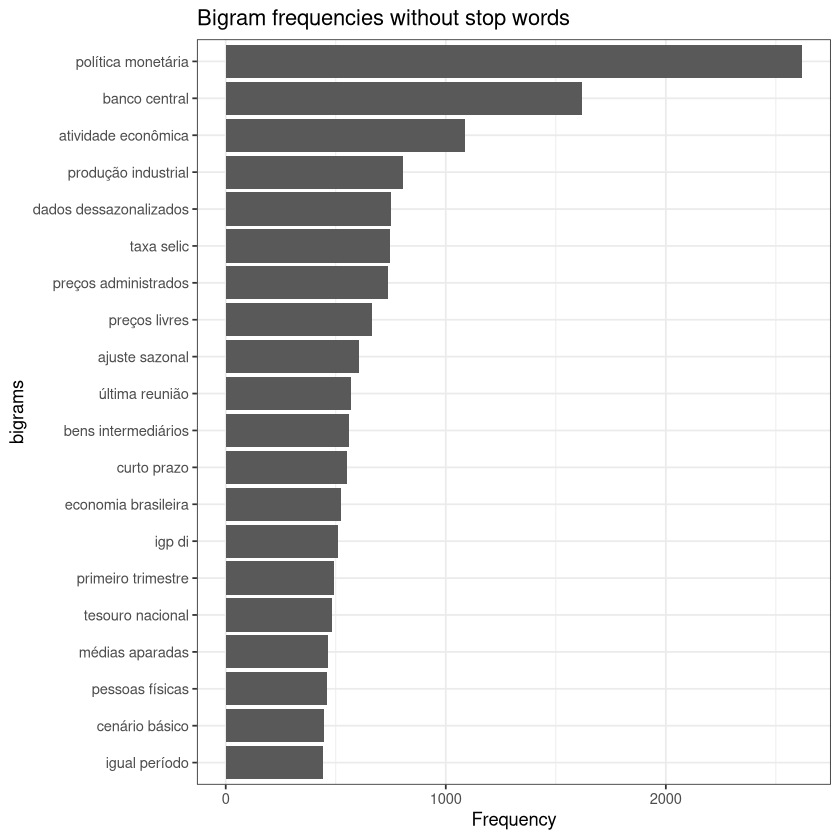

In [22]:
ggplot(bigramFreq2[1:numberOfBigram,],aes(x = reorder(word,n), n)) +
  geom_bar(stat="identity") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ylab("Frequency") + xlab("bigrams") + ggtitle("Bigram frequencies without stop words") +
  theme_bw() +
  coord_flip()

### bigrams cloud without stop words

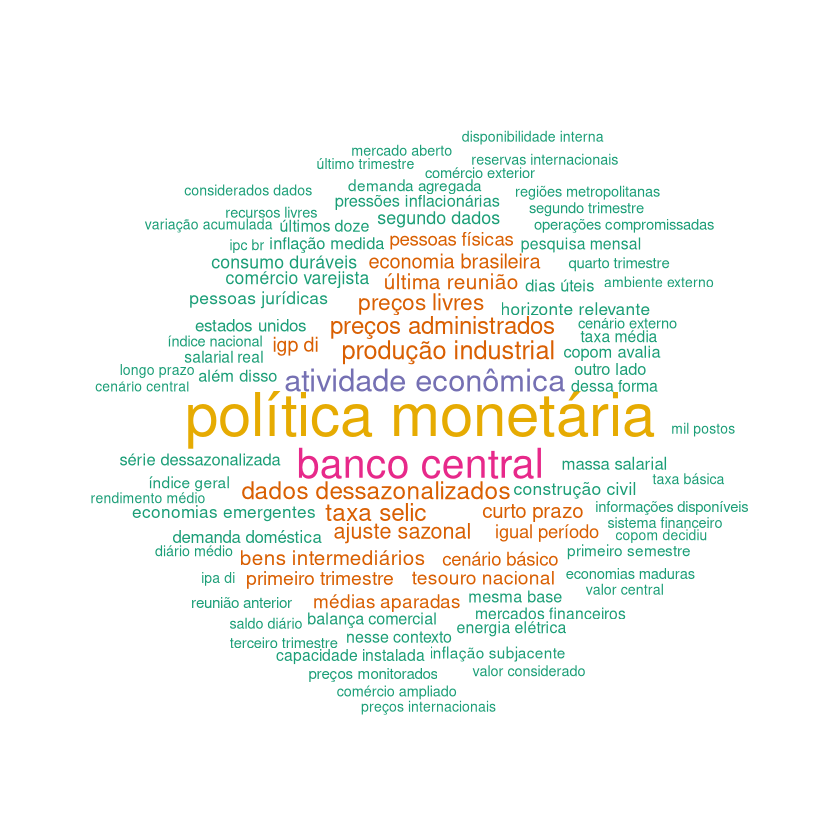

In [23]:
wordcloud(words = bigramFreq2$word,freq = bigramFreq2$n, min.freq = 200, random.order=FALSE, max.words=500, rot.per=0, colors=brewer.pal(6, "Dark2"),scale = c(3, 0.5))

## Trigram Frequency

In [24]:
numberOfTrigram <- 20

### With stop words

In [25]:
trigramFreq <- df %>%
  unnest_tokens(word, sentence, token = "ngrams", n = 3) %>%
  count(word, sort = TRUE) %>%
  ungroup()

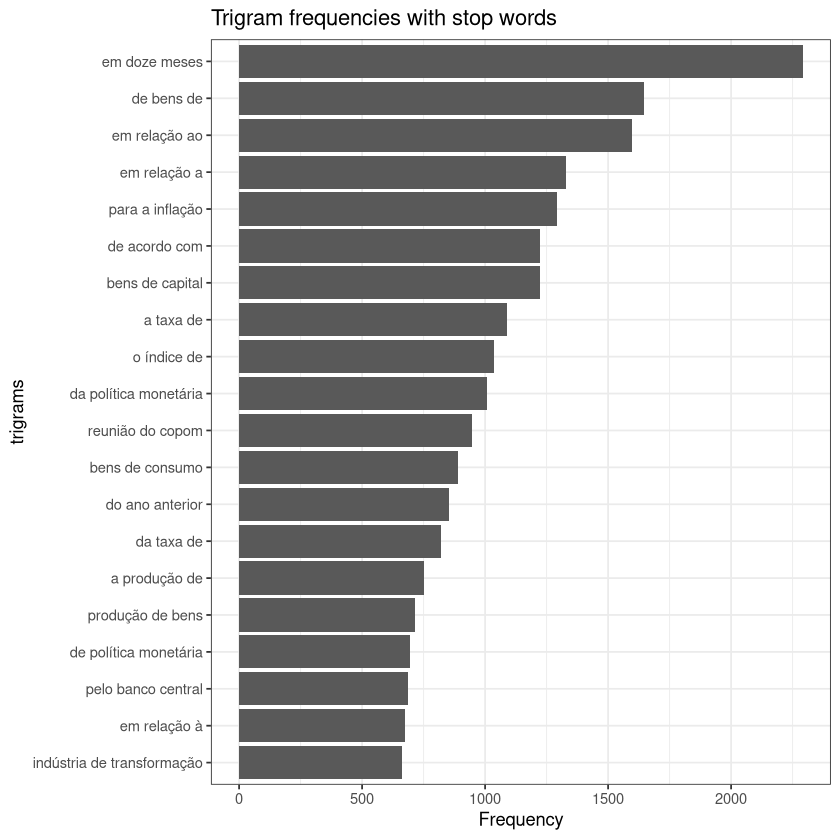

In [26]:
ggplot(trigramFreq[1:numberOfTrigram,],aes(x = reorder(word,n), n)) +
  geom_bar(stat="identity") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ylab("Frequency") + xlab("trigrams") + ggtitle("Trigram frequencies with stop words") +
  theme_bw() +
  coord_flip()

### Trigrams cloud with stop words

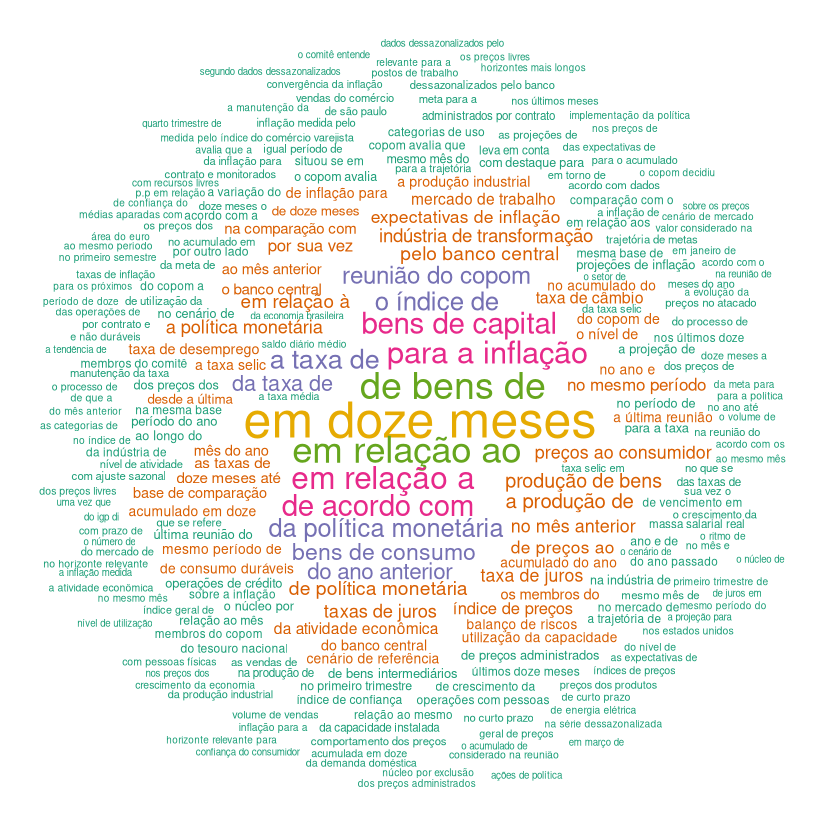

In [27]:
wordcloud(words = trigramFreq$word,freq = trigramFreq$n, min.freq = 100, random.order=FALSE, max.words=250, rot.per=0, colors=brewer.pal(6, "Dark2"),scale = c(2.5, 0.3))

### Without stop words

In [28]:
trigramFreq2 <- trigramFreq %>% select(word,n) %>% 
  separate(word, c("word1", "word2", "word3"), sep = " ")

trigramFreq2 <- trigramFreq2 %>%
  filter(!word1 %in% Mystopwords) %>%
  filter(!word2 %in% Mystopwords) %>% 
  filter(!word3 %in% Mystopwords)

trigramFreq2 <- trigramFreq2 %>% select(word1, word2, word3, n) %>% 
  unite(word, word1, word2, word3, sep = " ")

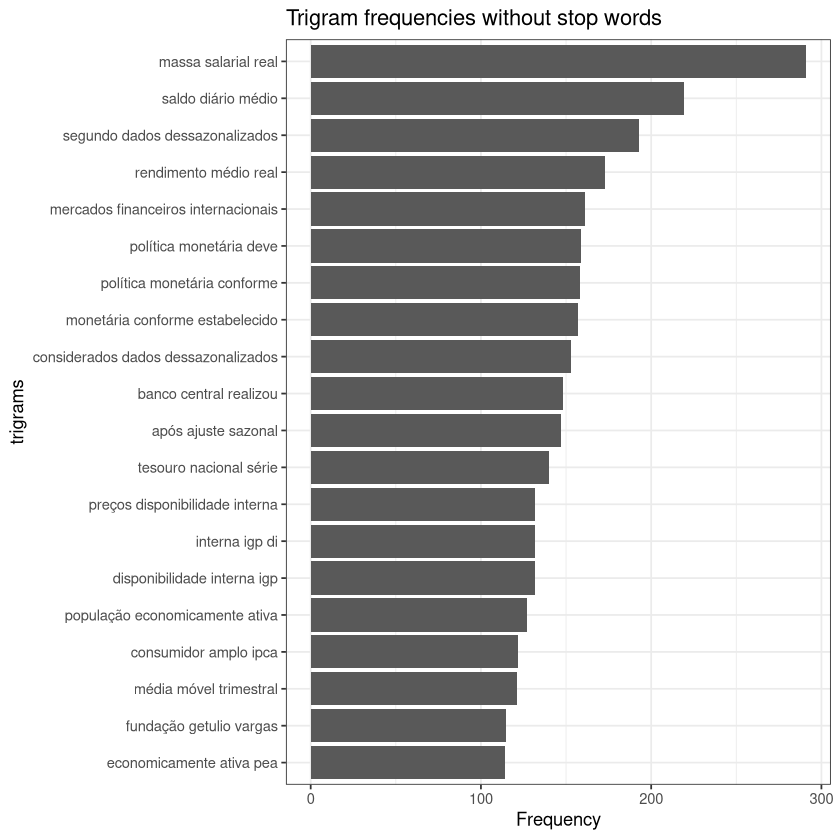

In [29]:
ggplot(trigramFreq2[1:numberOfTrigram,],aes(x = reorder(word,n), n)) +
  geom_bar(stat="identity") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ylab("Frequency") + xlab("trigrams") + ggtitle("Trigram frequencies without stop words") +
  theme_bw() +
  coord_flip()

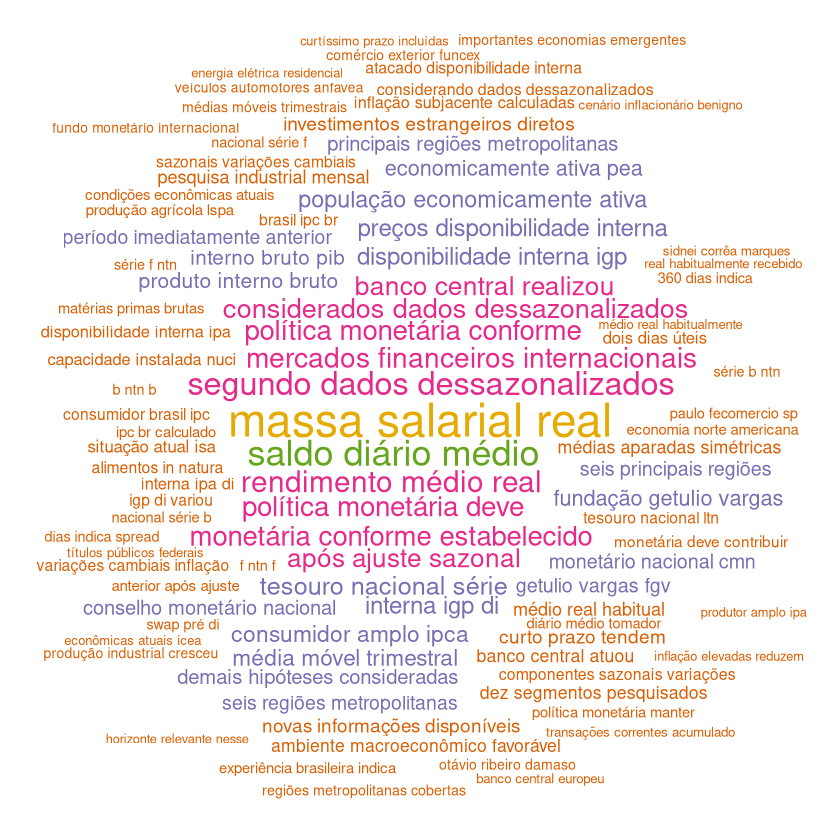

In [30]:
wordcloud(words = trigramFreq2$word,freq = trigramFreq2$n, min.freq = 50, random.order=FALSE, max.words=200, rot.per=0, colors=brewer.pal(6, "Dark2"),scale = c(2.3, 0.3))